In [1]:
from music_dealer import MusicDealer
from models import CnnModel, CrnnLongModel, CrnnModel
import json
from Paras_nb import Para
import os
import time
import numpy as np

import pyaudio
import wave

from pydub import AudioSegment


In [2]:
# Check for Audio Interface
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')

for i in range(0, numdevices):
    if (p.get_device_info_by_host_api_device_index(0, i).get('name')) == 'Scarlett 18i8 USB':
        device_index = p.get_device_info_by_host_api_device_index(0, i).get('index')
        device = p.get_device_info_by_host_api_device_index(0, i)
    if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
        print("Input Device id ", i, " - ",
              p.get_device_info_by_host_api_device_index(0, i).get('name'))


Input Device id  0  -  Seenie’s Phone Microphone
Input Device id  1  -  Scarlett 18i8 USB
Input Device id  2  -  MacBook Pro Microphone
Input Device id  4  -  ZoomAudioDevice


In [3]:
# Test if Device initialized
device

{'index': 1,
 'structVersion': 2,
 'name': 'Scarlett 18i8 USB',
 'hostApi': 0,
 'maxInputChannels': 18,
 'maxOutputChannels': 8,
 'defaultLowInputLatency': 0.01,
 'defaultLowOutputLatency': 0.0045578231292517,
 'defaultHighInputLatency': 0.1,
 'defaultHighOutputLatency': 0.014716553287981859,
 'defaultSampleRate': 44100.0}

In [ ]:
# Record Audio

chunk = 2048  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits
channels = 1
fs = 44100  # Record at 44100 samples per second
seconds = 10
filename = "guitar_recording.mp3"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording in...\n')
time.sleep(1)
print('3\n')
time.sleep(1)
print('2\n')
time.sleep(1)
print('1\n')
time.sleep(1)
print('Recording...')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                input_device_index=1,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 10 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    frames.append(data)

# Stop and close the stream
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()


In [11]:
# Record Audio

chunk = 2048  # Record in chunks of 1024 samples
sample_format = pyaudio.paInt16  # 16 bits 
channels = 1
fs = 44100  # Record at 44100 samples per second
seconds = 10
filename = "guitar_recording.mp3"

p = pyaudio.PyAudio()  # Create an interface to PortAudio

print('Recording in...\n')
time.sleep(1)
print('3\n')
time.sleep(1)
print('2\n')
time.sleep(1)
print('1\n')
time.sleep(1)
print('Recording...')

stream = p.open(format=sample_format,
                channels=channels,
                rate=fs,
                input_device_index=1,
                frames_per_buffer=chunk,
                input=True)

frames = []  # Initialize array to store frames

# Store data in chunks for 3 seconds
for i in range(0, int(fs / chunk * seconds)):
    data = stream.read(chunk)
    # data = pcm2float(data)
    # decoded = np.frombuffer(data, dtype='float32')
    frames.append(data)

# Stop and close the stream
stream.stop_stream()
stream.close()
# Terminate the PortAudio interface
p.terminate()

print('Finished recording')

decoded_sample_format = pyaudio.paFloat32

# Save the recorded data as a WAV file
wf = wave.open(filename, 'wb')
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(sample_format))
wf.setframerate(fs)
wf.writeframes(b''.join(frames))
wf.close()



Recording in...

3

2

1

Recording...
Finished recording


In [12]:
# Match the amplitude based on dBFS

def match_target_amplitude(sound, reference):
    change_in_dBFS = reference.dBFS - sound.dBFS
    print(sound.dBFS)
    print(reference.dBFS)
    return sound.apply_gain(change_in_dBFS)

file_path = 'guitar_recording.mp3'
sound = AudioSegment.from_file("guitar_recording.mp3")
reference = AudioSegment.from_file(
    "/Users/seanlevine/GT/Musical-Genre-Classification-master/electric_guitar/classical/classical_1_60BPM 2.mp3")

normalized_sound = match_target_amplitude(sound, reference)
normalized_sound.export("guitar_recording.mp3", format="mp3")


-20.362111078842755
-19.925569422761175


<_io.BufferedRandom name='guitar_recording.mp3'>

In [2]:
test_audio_path = "/Users/seanlevine/GT/Musical-Genre-Classification-master/electric_guitar/classical/classical_4_60BPM.mp3"

In [ ]:
from genericpath import isfile
from pydub import AudioSegment
import os
import pandas as pd

from sqlalchemy import false

file_names = []
rms = []
dBFS = []

data_path = '../electric_guitar/'
for (dirpath, dirnames, filenames) in os.walk(data_path):
    for au_file in filenames:
        current_path = dirpath + '/' + au_file
        if current_path != None and "DS_Store" not in current_path:

            if (os.path.isfile(current_path) == True):
                print(current_path)
                file_names.append(current_path)
                reference_audio = AudioSegment.from_file(current_path)

            # Measure the RMS amplitude of the reference audio file
                reference_rms = reference_audio.rms
            
                print("RMS: ", reference_rms)
                rms.append(reference_rms)
                print("dBFS: ", reference_audio.dBFS)
                dBFS.append(reference_audio.dBFS)

audio_list = pd.DataFrame(
    {'File Names': file_names,
     'RMS': rms,
     'dBFS': dBFS
    })


In [2]:
# Initialize predictor
WEIGHT_PATH = "../model/"
cnn_dealer = MusicDealer(WEIGHT_PATH + "CnnModel_guitar_JohnAll_128.pt", CnnModel())

In [3]:
file_path = 'guitar_recording.mp3'
test_audio_path = '/Users/seanlevine/GT/Datasets/IDMT-SMT-GUITAR_V2/dataset3/audio/pathetique_mono.wav'
res1, res2, res3, score = cnn_dealer.get_genre(test_audio_path)
score.keys()
# res1, res2, res3, score

Genre latin: 41.05%
Genre classical: 34.12%
Genre jazz: 24.83%


dict_keys([3, 4, 7, 0])

In [ ]:
res1, res2, res3, score = cnn_dealer.get_genre('../../Datasets/')
res1, res2, res3, score

In [2]:
import librosa
import librosa.display as display
import matplotlib.pyplot as plt

In [7]:
# This is the newer one
def frame_feature_extractor(file_path):
    signal, _ = librosa.load(file_path, sr=16000)
    # signal = signal[cut_wave_length: -1 * cut_wave_length] # cut wave length

    S = librosa.feature.melspectrogram(y=signal, sr=16000, n_mels=128).T
    S = librosa.power_to_db(S)
    if not S.shape[0] % 128 == 0:
        S = S[:-1 * (S.shape[0] % 128)]  # divide the mel spectrogram
    chunk_num = int(S.shape[0] / 128)  # was 64 for previous training
    mel_chunks = np.split(S, chunk_num)  # create 128 * 128 data frames
    return mel_chunks, chunk_num


In [4]:
import numpy as np
signal, chunk_num = frame_feature_extractor('guitar_recording.mp3')
plt.title('Test Guitar Recording (Metal)')
display.specshow(signal[0], y_axis='time')
plt.show()

/Users/seanlevine/opt/anaconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'guitar_recording.mp3'

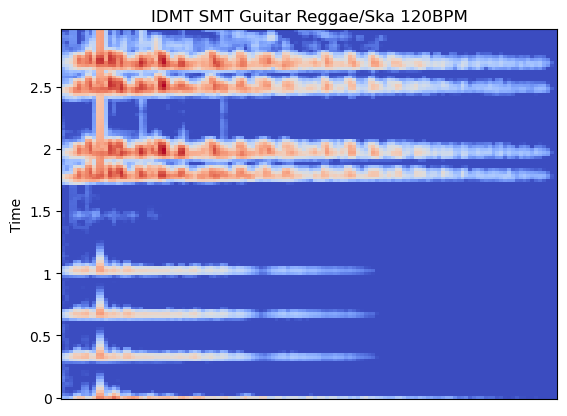

In [15]:
signal, chunk_num = frame_feature_extractor('../electric_guitar/reggae_ska/reggae_2_120BPM.mp3')
plt.title('IDMT SMT Guitar Reggae/Ska 120BPM')
display.specshow(signal[1], y_axis='time')
plt.show()


In [57]:
from pythonosc.udp_client import SimpleUDPClient
import time
import collections

ip = "127.0.0.1"
port = 1338

client = SimpleUDPClient(ip, port)  # Create client
# client.send_message("/setpreset", res1)

In [58]:
# Initialize predictor
WEIGHT_PATH = "../model/"
cnn_dealer = MusicDealer(WEIGHT_PATH + "CnnModel_guitar_JohnAll_128.pt", CnnModel())

In [74]:
preset_num = 9

In [78]:

path_to_json_file = "effects_params.json"


with open(path_to_json_file) as f:
    effects_params = json.load(f)


def interpDictionary(dictionaries, percentages):
   interp_dict = collections.defaultdict(dict)
   temp_val = []
   for idx, val in enumerate(dictionaries):
        elem = effects_params['pattrstorage']['slots'][str(val+1)]['data']

        for key, value in elem.items():
            if bool(interp_dict[key]):
                temp_val = interp_dict[key]
                temp_val += (value[0] * percentages[idx]/100.0)
            else:
                temp_val = (value[0] * percentages[idx]/100.0)
            interp_dict.update({key: temp_val})
 
   return interp_dict


test_audio_path = "/Users/seanlevine/GT/Musical-Genre-Classification-master/electric_guitar/rock_blues/rock_1_100BPM.mp3"
res1, res2, res3, score = cnn_dealer.get_genre(test_audio_path)
print(score)
genres = list(score.keys())
percents = list(score.values())

interp_dict = interpDictionary(genres, percents)
    #TODO: Automate message sending based on dictionary name
for key, value in interp_dict.items():
    client.send_message(key, [preset_num, value])
    # print(key)
    # print(value)

client.send_message("/end", preset_num-1)
preset_num += 1

Genre rock_blues: 87.61%
Genre classical: 6.98%
Genre country_folk: 5.4%
{1: 87.61043650304885, 4: 6.984721578427368, 5: 5.404841918523791, 0: 0.0}
